## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


**Attribute Information:**

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv("wholesome_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA

<Axes: xlabel='Milk', ylabel='Grocery'>

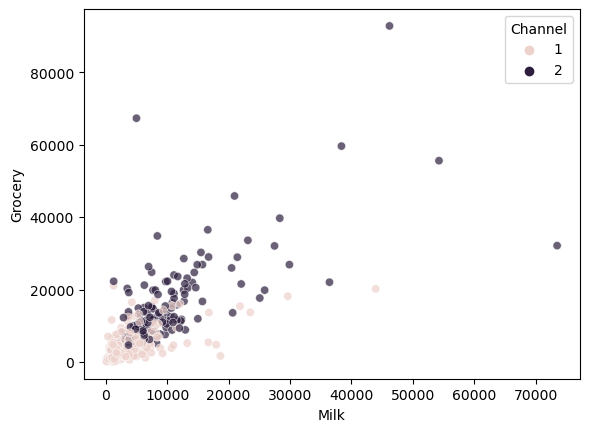

In [36]:
sns.scatterplot(x="Milk", y="Grocery", data=df, hue="Channel",
               alpha=0.7)

<Axes: xlabel='Milk', ylabel='Count'>

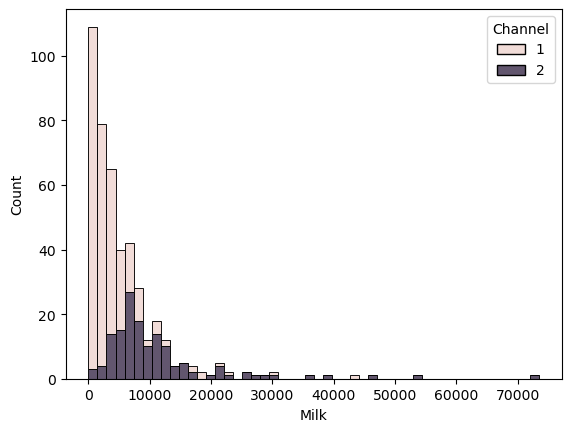

In [37]:
sns.histplot(df,x='Milk',hue='Channel',multiple="stack")

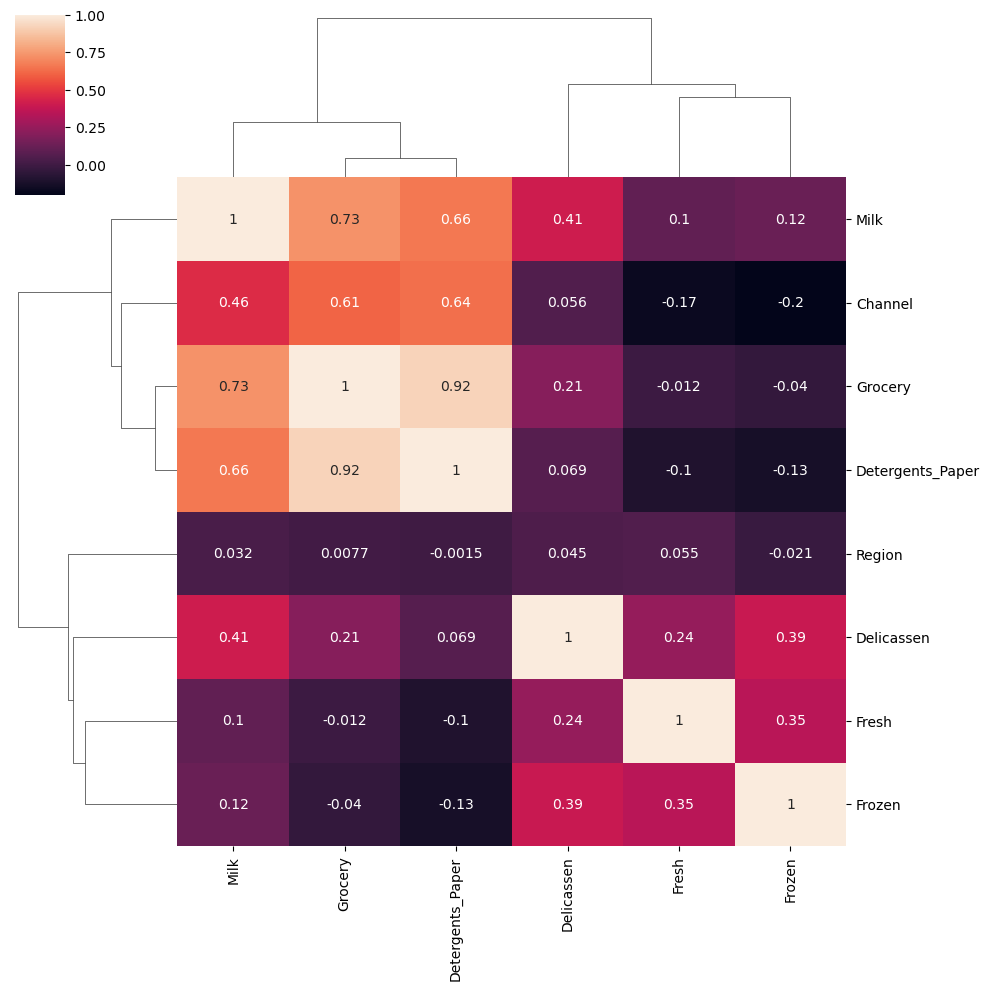

In [38]:
sns.clustermap(df.corr()[["Milk", "Grocery","Detergents_Paper",
                        "Delicassen", "Fresh", "Frozen"]], annot=True)

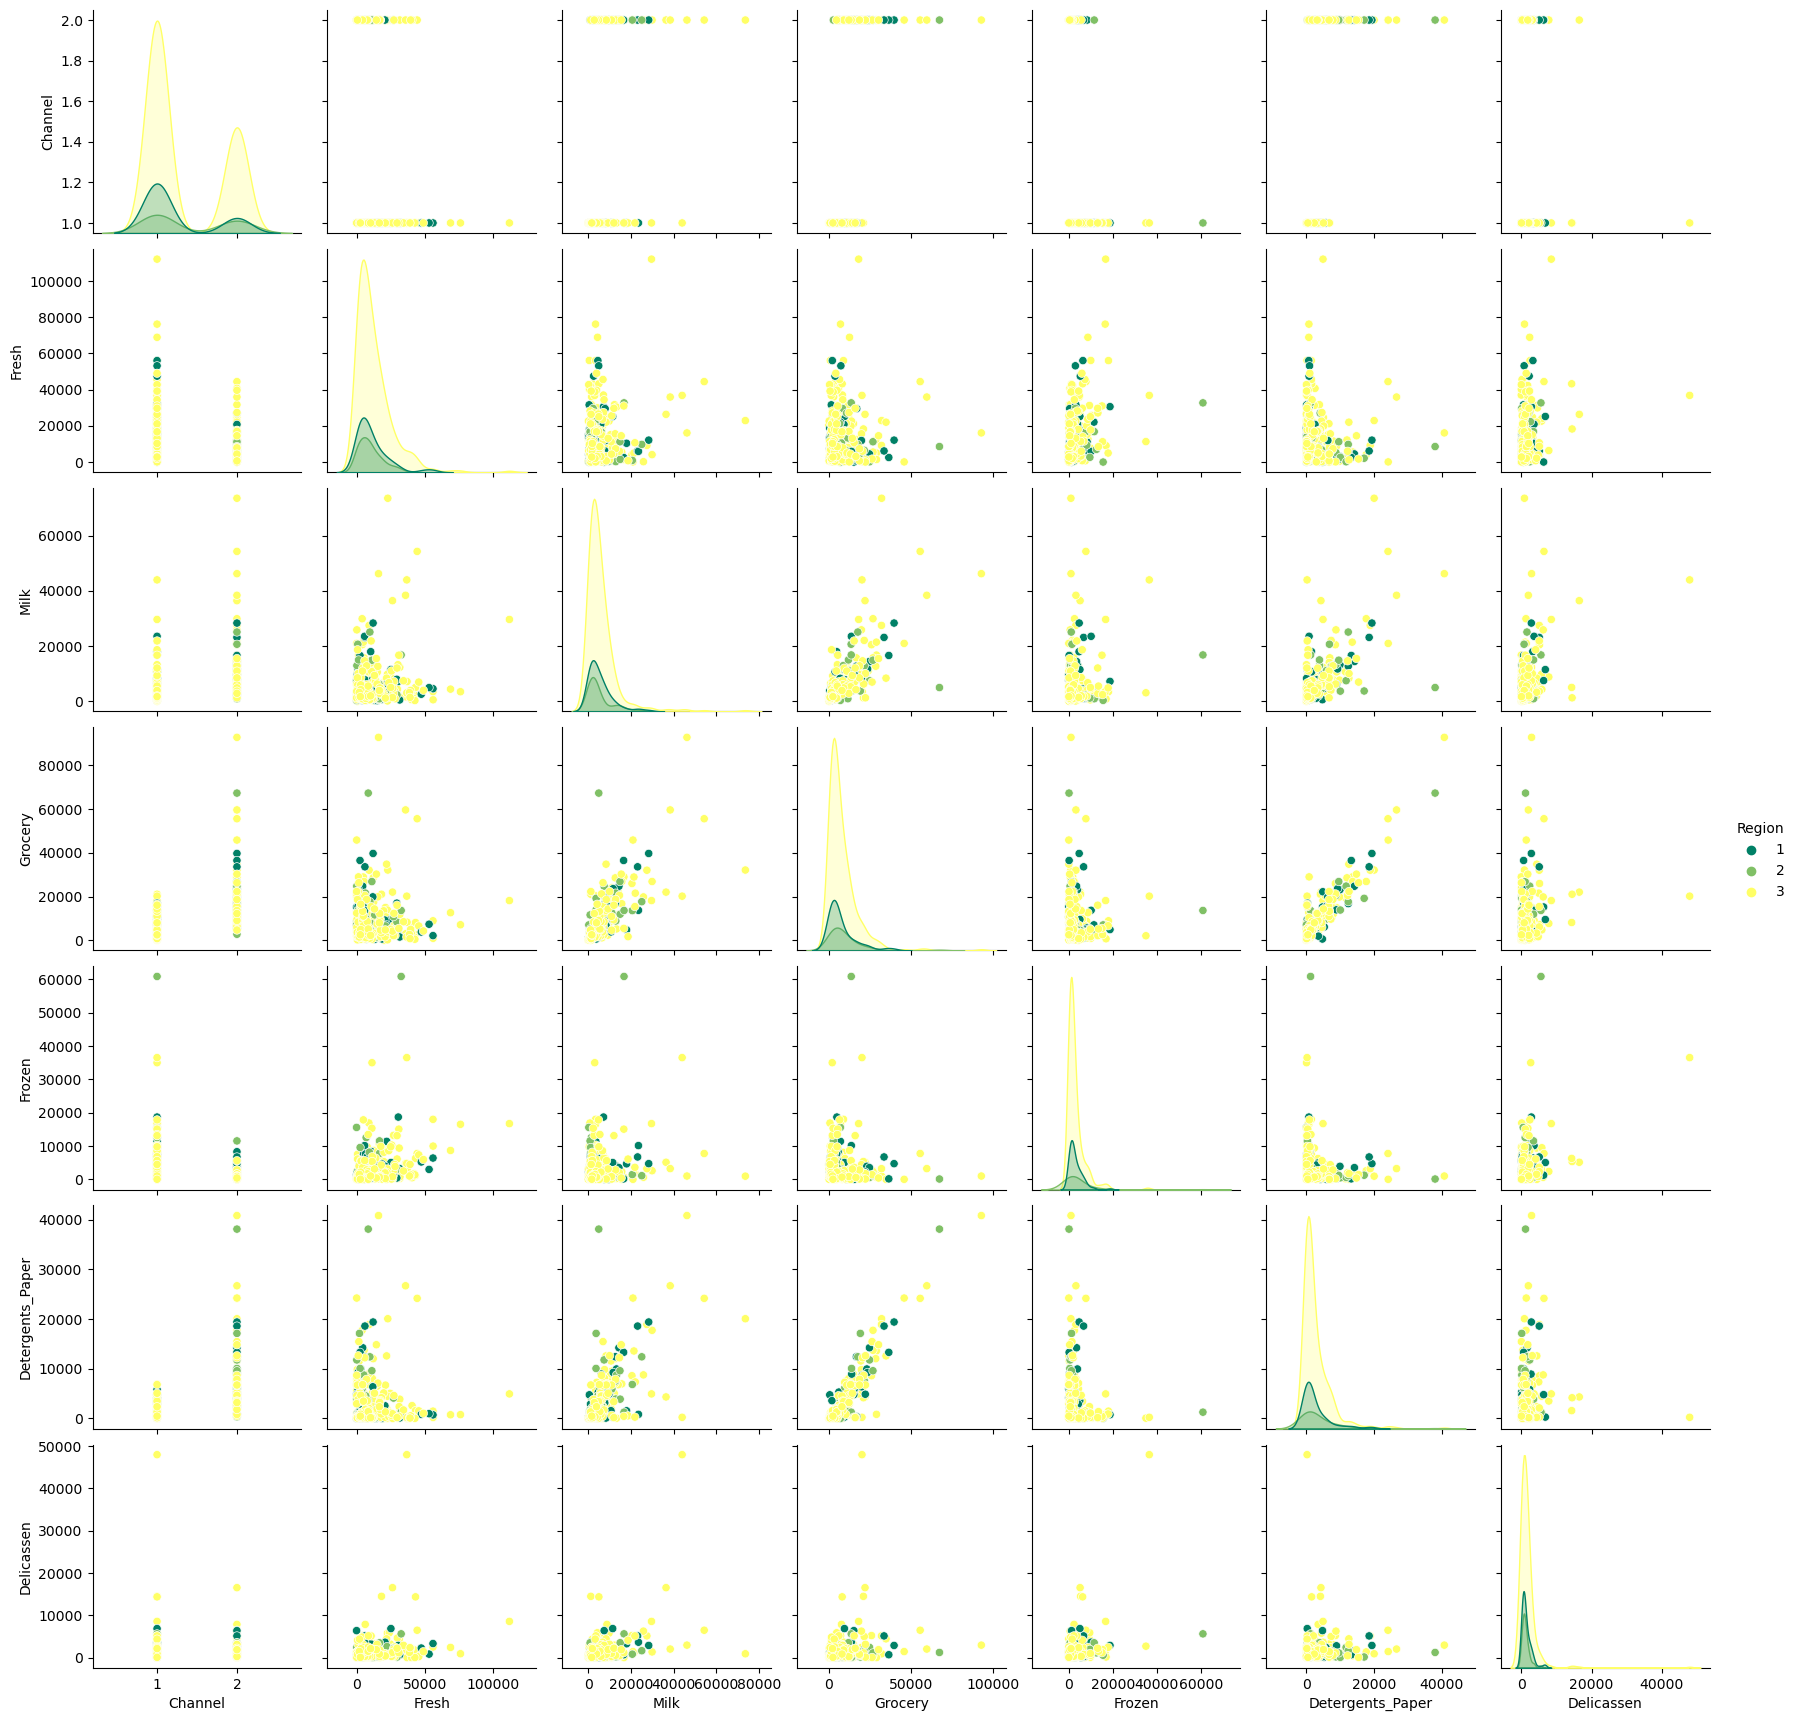

In [39]:
sns.pairplot(df, hue="Region", palette="summer")

## DBSCAN

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [41]:
df.shape[1]

8

#### To check for the optimal value for epsilon

In [42]:
from sklearn.cluster import DBSCAN

number_of_outliers=[]
percent_outliers=[]
for eps in np.linspace(0.001,3,50):
    dbscan = DBSCAN(eps=eps, min_samples=2*(df.shape[1]))
    dbscan.fit(scaled_df)
    perc_of_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    percent_outliers.append(perc_of_outliers)
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

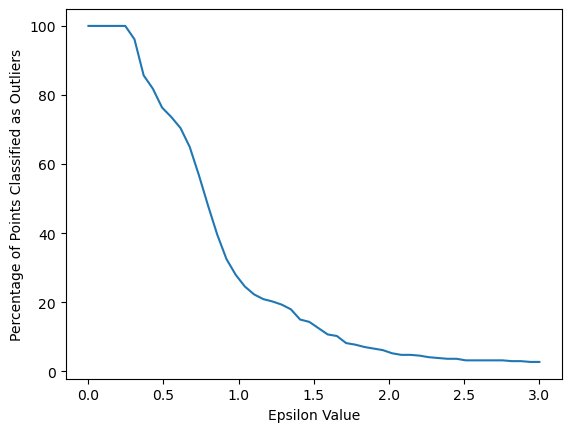

In [43]:
plt.plot(np.linspace(0.001,3,50), percent_outliers)
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Points Classified as Outliers");

In [44]:
# Total number of outliers
np.sum(dbscan.labels_ == -1)

12

### To get the number of outliers

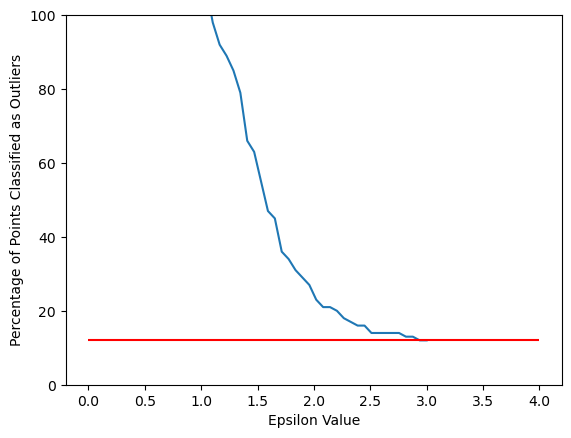

In [48]:
plt.plot(np.linspace(0.001,3,50), number_of_outliers)
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Points Classified as Outliers")
plt.ylim(0,100)
plt.hlines(y=np.sum(dbscan.labels_ == -1), xmin=0,xmax=4, color="red");

### Hypertuned DBSCAN

In [49]:
dbscan = DBSCAN(eps=1.75, min_samples=2*df.shape[1])
dbscan.fit(scaled_df)

DBSCAN(eps=1.75, min_samples=16)

<Axes: xlabel='Grocery', ylabel='Milk'>

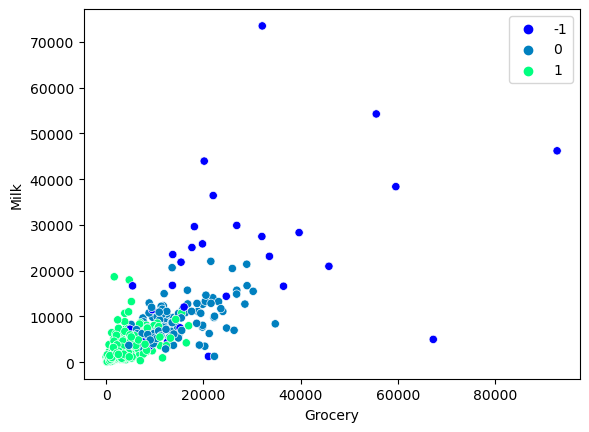

In [50]:
sns.scatterplot(x="Grocery", y="Milk",
                hue=dbscan.labels_, data=df,
               palette="winter")

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

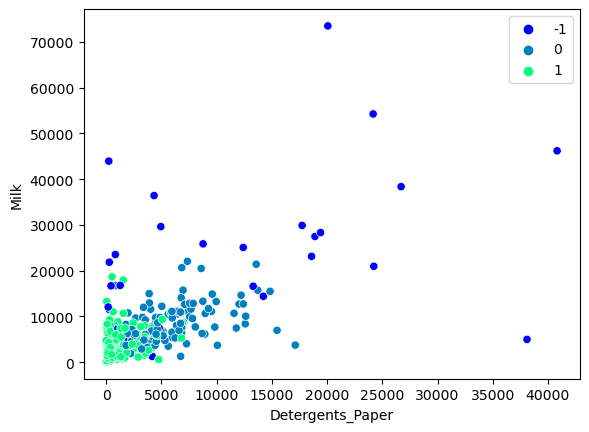

In [83]:
sns.scatterplot(x="Detergents_Paper", y="Milk",
               data=df, hue=dbscan.labels_,
               palette="winter")


In [53]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0, -1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0, -1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,  1,  1,  0, -1, -1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1, -1,  1, -1,  1,  1,
        1,  1,  0,  1,  1

In [54]:
df["Labels"] = dbscan.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [55]:
categories = df.drop(["Region", "Channel"], axis=1)
categories

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


### Mean values with respect to continuous values 

In [71]:
category_mean=categories.groupby("Labels").mean()
category_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27370.722222,19274.611111,22685.888889,9769.194444,9107.694444,5459.138889
0,8334.709677,8402.282258,13614.830645,1389.508065,5841.717742,1458.161290
1,11647.432143,2909.242857,3548.682143,2955.928571,770.025000,1048.578571


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
data = scaler1.fit_transform(category_mean)
data_category=pd.DataFrame(data, index=category_mean.index, 
             columns=category_mean.columns)

data_category

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.33565,0.525999,0.000000,0.608287,0.092864
1,0.174024,0.00000,0.000000,0.186931,0.000000,0.000000


<Axes: ylabel='Labels'>

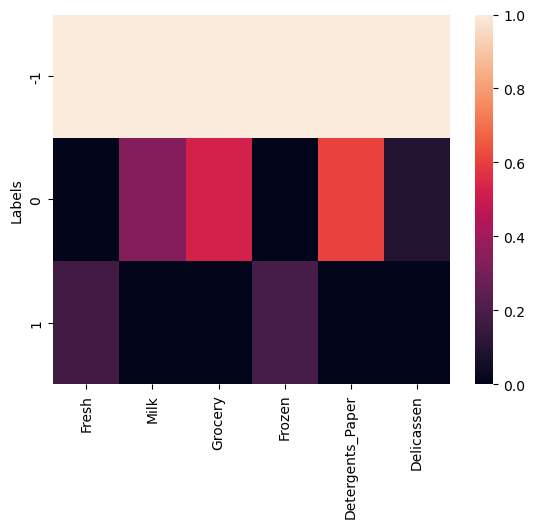

In [74]:
sns.heatmap(data_category)

<Axes: ylabel='Labels'>

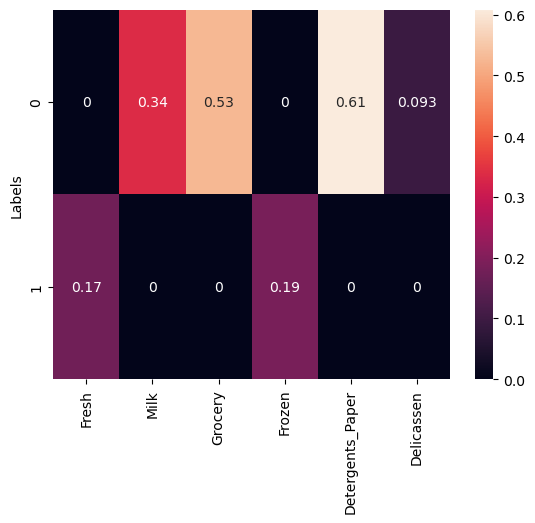

In [79]:
#Heatmap after removing outliers
sns.heatmap(data_category.loc[[0,1]],annot=True)